# Heart Disease Prediction Using Logistic Regression

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [2]:
# loading the csv data to pandas dataframe
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
# printing first 5 rows of the data set
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# printing last 5 rows of the data set
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [6]:
# getting some information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# checking for the missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


E.D.A - Essential Data Analysation

General overview of data.

1) age

2) sex - (1 = male; 0 = female)

3) cp - chest pain type (4 values)

4) trestbps - resting blood pressure

5) chol - serum cholestoral in mg/dl

6) fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7) restecg - resting electrocardiographic results (values 0,1,2)

8) thalach - maximum heart rate achieved

9) exang - exercise induced angina (1 = yes; 0 = no)

10) oldpeak - ST depression induced by exercise relative to rest

11) slope - the slope of the peak exercise ST segment

12) ca - number of major vessels (0-3) colored by flourosopy

13) thal - 0 = normal; 1 = fixed defect; 2 = reversable defect.

14) traget - (1 = died; 0 = lived)

Chest Pain Types

a. value 0 : typical angina

b. value 1 : atypical angina

c. value 2 : non-anginal pain

d. value 3 : asymptomatic

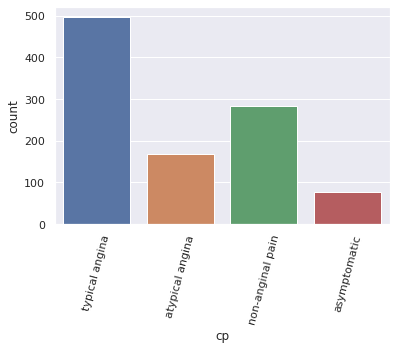

In [9]:
sns.countplot(heart_data['cp'])
plt.xticks([0,1,2,3],["typical angina", "atypical angina", "non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

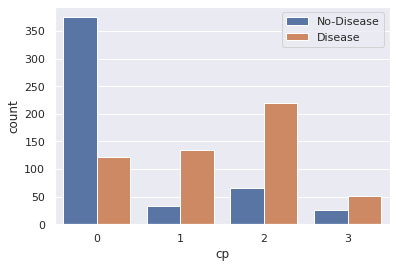

In [10]:
# Chest Pain Distribution as per Target variable
sns.countplot(x="cp", hue="target", data=heart_data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

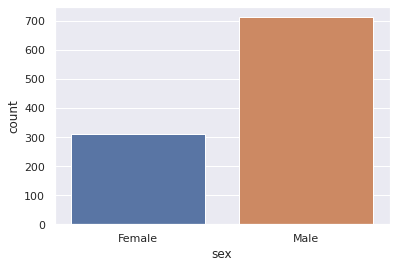

In [11]:
# count of male & female in this dataset
sns.countplot(heart_data['sex'])
plt.xticks([0,1],['Female', 'Male'])
plt.show()

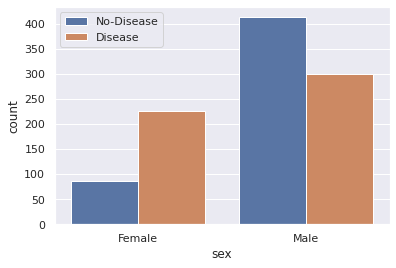

In [12]:
# Gender distribution according to Target variable
sns.countplot(x='sex',hue="target",data=heart_data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

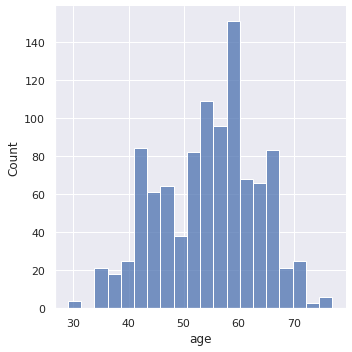

In [13]:
# age distribution in the dataset
sns.displot(heart_data['age'],bins=20)
plt.show()

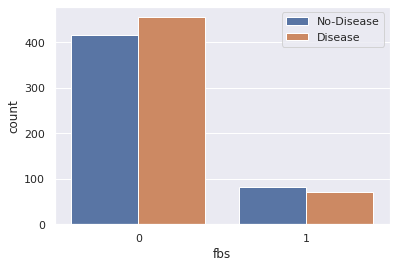

In [14]:
# Fasting blood sugar distribution according to Target variable
sns.countplot(x="fbs", hue="target", data=heart_data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

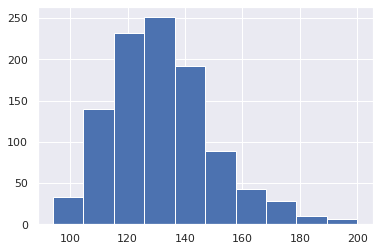

In [15]:
# Resting Blood Pressure Distribution
heart_data['trestbps'].hist()

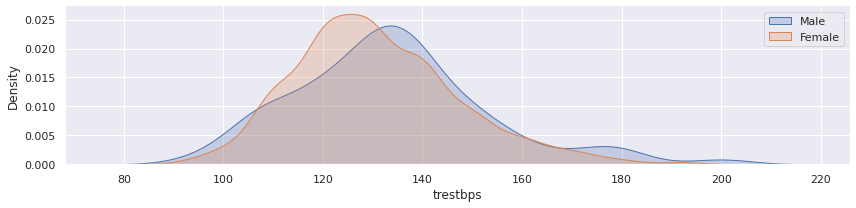

In [ ]:
# Comparing resting blood pressure as per sex column
g = sns.FacetGrid(heart_data,hue="sex",aspect=4)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['Male', 'Female'])

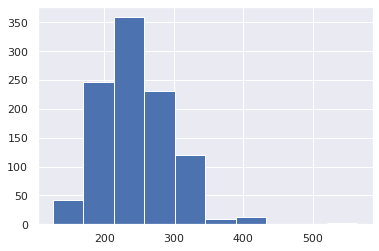

In [16]:
# Distribution of serum cholestrol
heart_data['chol'].hist()

In [17]:
# Plotting of continuous variables
cate_val=[]
cont_val=[]

for column in heart_data.columns:
    if heart_data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [18]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

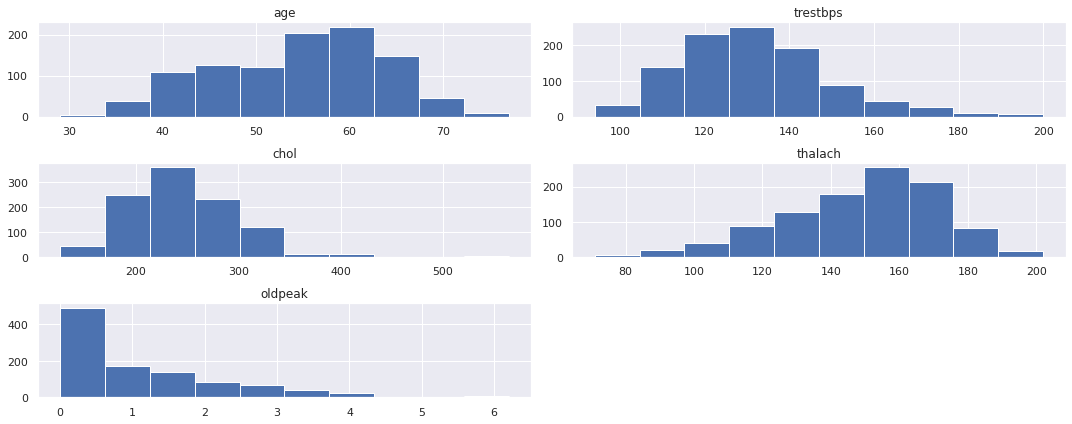

In [20]:
heart_data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

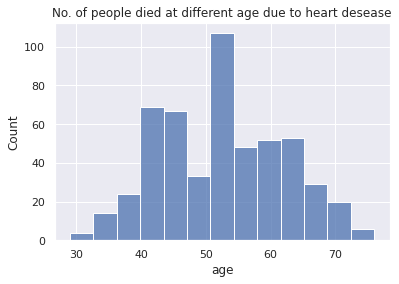

In [21]:
Deceased = heart_data.age.where(heart_data.target == 1)

sns.histplot(Deceased)
plt.title('No. of people died at different age due to heart desease');

This plot shows that count of people died at different age, and people with age between 50-55 has highest count.

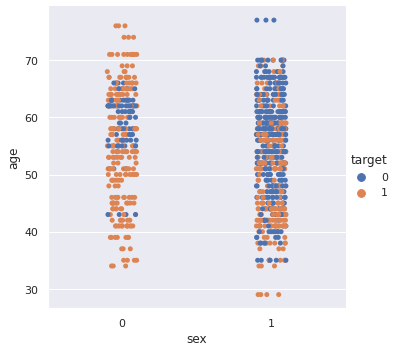

In [22]:
sns.catplot(x='sex',y='age',hue='target',data=heart_data);

Here sex (1 = male; 0 = female) and target (1 = died; 0 = lived)

This plot shows count of male female died at different age

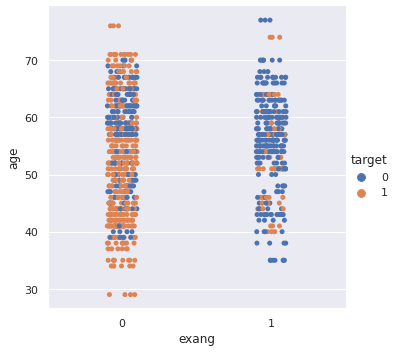

In [23]:
sns.catplot(x='exang',y='age',hue='target',data=heart_data);

Here exang (1 = yes 0 = no) and target (1 = died; 0 = lived)

This plot shows different age group of people who survied because of exercie.

Exploratory Analysis And Visualisation Of The Data

In [24]:
heart_data.corr().style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


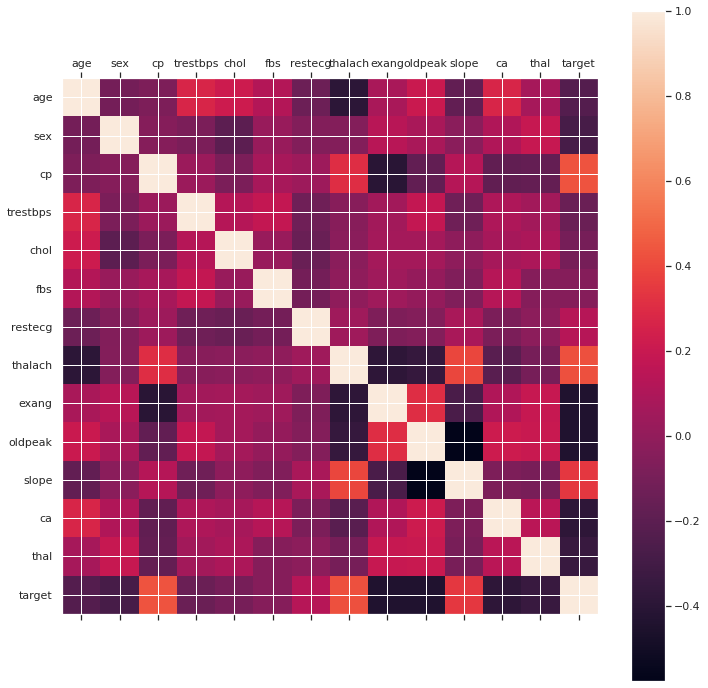

In [25]:
rcParams['figure.figsize'] = 14, 12
plt.matshow(heart_data.corr())
plt.yticks(np.arange(heart_data.shape[1]), heart_data.columns)
plt.xticks(np.arange(heart_data.shape[1]), heart_data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed6ad2b050>,
      dtype=object)

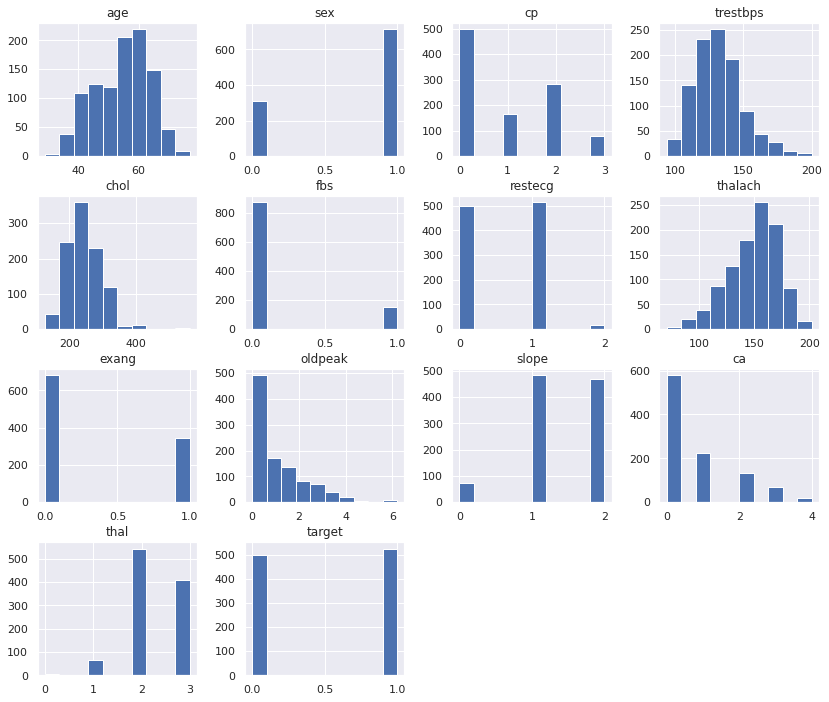

In [26]:
# histogram for each variables
heart_data.hist()

In [27]:
# checking the distribution of target variables
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

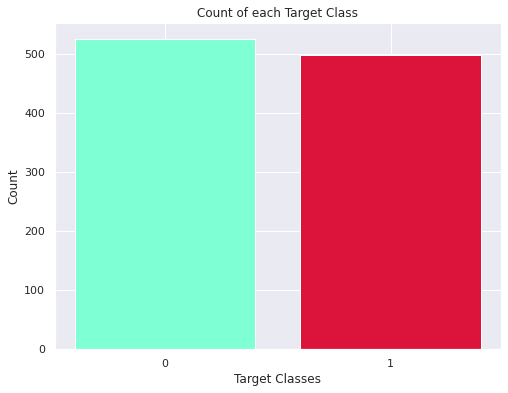

In [28]:
rcParams['figure.figsize'] = 8,6
plt.bar(heart_data['target'].unique(), heart_data['target'].value_counts(), color = ['aquamarine', 'crimson'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

0 --> Healty Heart
1 --> Defective Heart

Splitting the Features and Target

In [29]:
X = heart_data.drop(columns='target')
Y = heart_data['target']

In [30]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [31]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into Training data & Test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [34]:
model = LogisticRegression()

In [35]:
# training with Logistic Regression model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [36]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy on Traing Data : ', training_data_accuracy)

Accuracy on Traing Data :  0.8548780487804878


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.8536585365853658


Building a Predictive System

In [40]:
# taking user inputs
name = input("Enter the name of the patient = ")
print()

age = input("Enter the age in years = ")
print()

sex = input("Enter the gender (1-> male, 0-> female) = ")
print()

cp = input("Enter the chest pain type (4 values from 0-3) = ")
print()

trestbps = input("Enter the resting blood pressure (in mm Hg on admission to the hospital) = ")
print()

chol = input("Enter the serum cholestrol in mg/dl = ")
print()

fbs = input("Enter the fasting blood sugar &gt; 120 mg/dl (1 -> true; 0 -> false) = ")
print()

restecg = input("Enter the resting electrocardiographic results = ")
print()

thalach = input("Enter the maximum heart rate achieved = ")
print()

exang = input("Enter the exercise induced angina (1 -> yes; 0 -> no) = ")
print()

oldpeak = input("Enter the ST depression induced by exercise relative to rest = ")
print()

slope = input("Enter the the slope of the peak exercise ST segment = ")
print()

ca = input("Enter the number of major vessels (0-3) colored by flourosopy = ")
print()

thal = input("Enter the thal (1 -> normal; 2 -> fixed defect; 3 -> reversable defect) = ")
print()

Enter the name of the patient = Adam Ken

Enter the age in years = 67

Enter the gender (1-> male, 0-> female) = 0

Enter the chest pain type (4 values from 0-3) = 0

Enter the resting blood pressure (in mm Hg on admission to the hospital) = 106

Enter the serum cholestrol in mg/dl = 223

Enter the fasting blood sugar &gt; 120 mg/dl (1 -> true; 0 -> false) = 0

Enter the resting electrocardiographic results = 1

Enter the maximum heart rate achieved = 142

Enter the exercise induced angina (1 -> yes; 0 -> no) = 0

Enter the ST depression induced by exercise relative to rest = 0.3

Enter the the slope of the peak exercise ST segment = 2

Enter the number of major vessels (0-3) colored by flourosopy = 2

Enter the thal (1 -> normal; 2 -> fixed defect; 3 -> reversable defect) = 2



In [41]:
input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print(name + " does not have a heart disease")
else:
  print(name + " has a possible heart disease")

[1]
Adam Ken has a possible heart disease
